# Importing Libraries

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline

## Model evaluators
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Models to be used
import xgboost as XGB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data Preview

In [60]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning

In [44]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
df=df.dropna(subset=["LoanAmount"], axis=0)
df=df.dropna(subset=["Dependents"], axis=0)

In [63]:
df['Self_Employed'].value_counts()

No     471
Yes     77
Name: Self_Employed, dtype: int64

In [64]:
df['Gender'].value_counts()

Male      459
Female    107
Name: Gender, dtype: int64

In [65]:
df['Married'].value_counts()

Yes    377
No     202
Name: Married, dtype: int64

In [66]:
df['Self_Employed'].fillna('No',inplace=True)
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)

In [67]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median()) 
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [68]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

# Data Visualization & Exploratory Analysis

([], [])

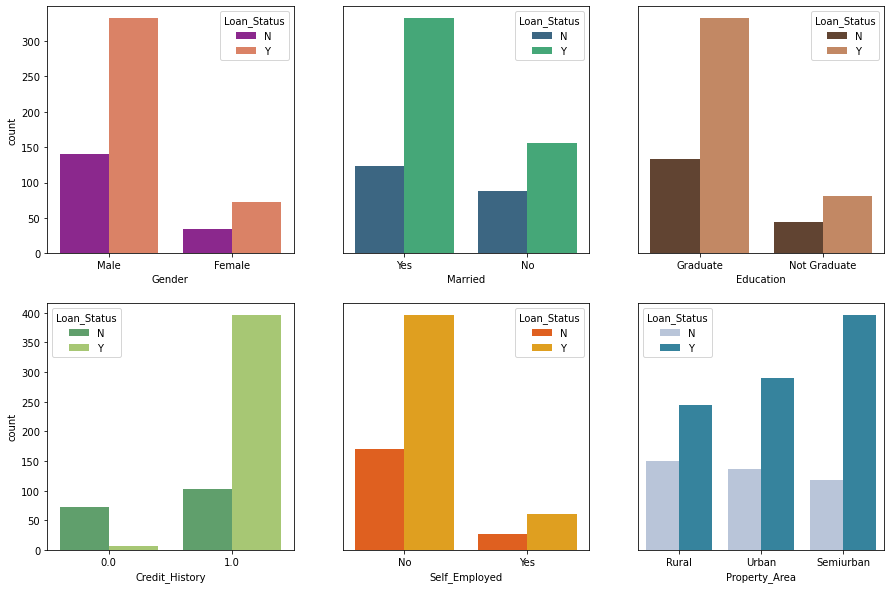

In [70]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='Gender' ,hue='Loan_Status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.countplot(x='Married',hue='Loan_Status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='Credit_History', data=df,hue='Loan_Status',palette='summer')

plt.subplot(2,3,5)
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='Property_Area',data=df,hue='Loan_Status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

Loan repayment comparison between Genders shows that a male gender has better chances of repaying than female.

Loan repayment comparison in Married Status shows that married individuals has better chances of repaying than non-married individuals.

Loan repayment comparison using educational status shows that a graduate individual has better chances of repaying.

Loan repayment comparison using Self-Employed status shows that those who are employed has better chances of repaying than others who are not.

Loan repayment comparison using Credit History shows that an individual with a credit history has more chances of repaying.

Loan repayment comparison using Property Area shows that People living in Semi-Urban area have better chances of repaying.

On average, men got more loans. Being married & educated (graduate) were also factors that resulted in loan approvals.

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

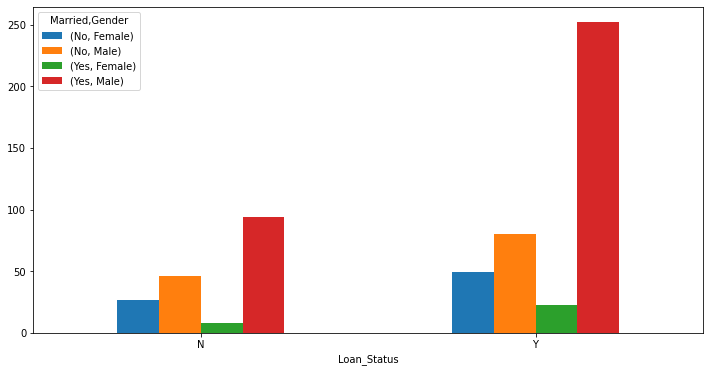

In [71]:
product_status= pd.crosstab(index=df['Loan_Status'], columns=[df['Married'],df['Gender']] )
product_status.plot(kind='bar',figsize=(12,6))
plt.xticks(rotation=360)

This visualisation shows that married males has the highest chances of repaying loan

# Data Pre-processing for Model Building

In [37]:
from sklearn.preprocessing import LabelEncoder

In [72]:
model1=LabelEncoder()
model1.fit(df['Gender'])
df['Gender'] = model1.transform(df['Gender'])

In [75]:
var_mod = ['Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

Gender                 int32
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [76]:
le = LabelEncoder()
for i in var_mod:
    df[i] = le.ﬁt_transform(df[i].astype(str))
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

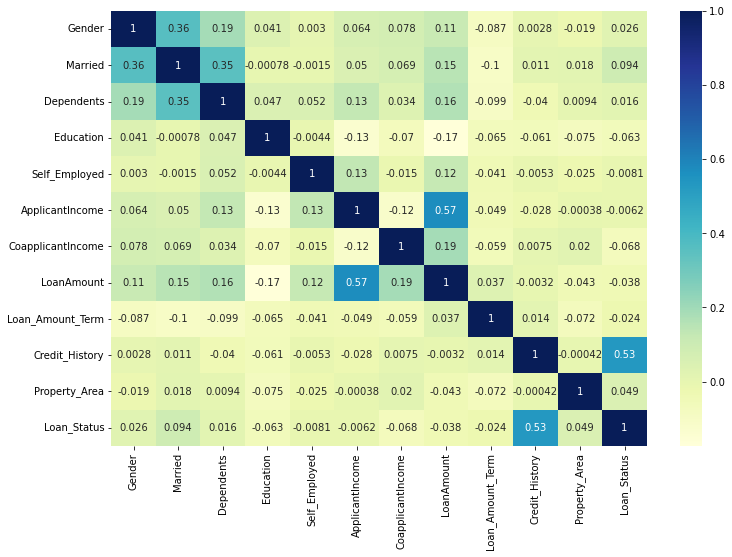

In [79]:
plt.figure(figsize=(12,8))
correlations = df.corr()
  
# plotting correlation heatmap
dataplot = sns.heatmap(correlations, cmap="YlGnBu", annot=True)
plt.show()

# Creating and Comparing Models

In [81]:
x = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [102]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_lr = lr.predict(x_test)

In [103]:
lr.score(x_test, y_test)

0.8017241379310345

In [104]:
cm = confusion_matrix(y_test, y_lr)
cm

array([[20, 21],
       [ 2, 73]], dtype=int64)

In [105]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.91      0.49      0.63        41
           1       0.78      0.97      0.86        75

    accuracy                           0.80       116
   macro avg       0.84      0.73      0.75       116
weighted avg       0.82      0.80      0.78       116



In [112]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(x_train, y_train)
y_rand = rand.predict(x_test)

In [113]:
rand.score(x_test, y_test)

0.8017241379310345

In [114]:
cm = confusion_matrix(y_test, y_rand)
cm

array([[21, 20],
       [ 3, 72]], dtype=int64)

In [115]:
print(classification_report(y_test, y_rand))

              precision    recall  f1-score   support

           0       0.88      0.51      0.65        41
           1       0.78      0.96      0.86        75

    accuracy                           0.80       116
   macro avg       0.83      0.74      0.75       116
weighted avg       0.82      0.80      0.79       116



In [118]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_dtree = dtree.predict(x_test)

In [120]:
dtree.score(x_test, y_test)

0.6982758620689655

In [121]:
cm = confusion_matrix(y_test, y_dtree)
cm

array([[19, 22],
       [13, 62]], dtype=int64)

In [122]:
print(classification_report(y_test, y_dtree))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        41
           1       0.74      0.83      0.78        75

    accuracy                           0.70       116
   macro avg       0.67      0.65      0.65       116
weighted avg       0.69      0.70      0.69       116



In [123]:
xgb  = XGB.XGBClassifier()
xgb.fit(x_train, y_train)
y_xgb = xgb.predict(x_test)

C:\Users\princ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:59:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
xgb.score(x_test, y_test)

0.8103448275862069

In [125]:
cm = confusion_matrix(y_test, y_xgb)
cm

array([[24, 17],
       [ 5, 70]], dtype=int64)

In [126]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        41
           1       0.80      0.93      0.86        75

    accuracy                           0.81       116
   macro avg       0.82      0.76      0.77       116
weighted avg       0.81      0.81      0.80       116



In [128]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)
knn_prediction=knn.predict(x_test)

In [129]:
knn.score(x_test, y_test)

0.646551724137931

In [130]:
cm = confusion_matrix(y_test, knn_prediction)
cm

array([[ 0, 41],
       [ 0, 75]], dtype=int64)

In [131]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.65      1.00      0.79        75

    accuracy                           0.65       116
   macro avg       0.32      0.50      0.39       116
weighted avg       0.42      0.65      0.51       116



C:\Users\princ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\princ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\princ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion

For our ML model, at 81% accuracy, the XGBoost model is the most suitable to make this prediction.